# Рынок заведений общественного питания г. Москвы.

Руководством было принято решение открыть новое заведение общественного питания в г.Москва.

Целью данного проекта является разработка рекомендации о виде заведения, количестве посадочных мест, а также районе расположения открывающегося объекта общественного питания.

Поставленая задача: исследовать рынок заведений общественного питания Москвы.

Известны открытые данные о заведениях общественного питания в Москве.

# Изучение общей информации файла

Загрузим полученный файл и выведем на экран несколько строк из него:

In [1]:
# Подключим библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Сохраним уникальный путь к файлу в перееменную path:
path = '/Users/PPC/Desktop/practica/pitanie/'
# Сохраним датафрейм в переменную df:
df = pd.read_csv(path + 'rest_data.csv')
#df.head(15)
#df.tail(15)
df.sample(15)

,id,object_name,chain,object_type,address,number
11332,190390,Пицца ДЖЭТ,нет,магазин (отдел кулинарии),"город Москва, бульвар Адмирала Ушакова, дом 18Б",0
10763,173757,ВЕРАНДА 14,нет,ресторан,"город Москва, Лесная улица, дом 20, строение 6",95
13180,193148,G arbuz,нет,ресторан,"город Москва, Турчанинов переулок, дом 3, стро...",100
6172,80913,Кахури,нет,кафе,"город Москва, улица Миклухо-Маклая, дом 28Б",40
10847,187665,Кафе Патриот,нет,кафе,"город Москва, Ленинградский проспект, дом 39, ...",28
4755,29767,То Да Сё,да,кафе,"город Москва, Нижегородская улица, дом 8",90
6876,24667,Обжорный ряд,да,предприятие быстрого обслуживания,"город Москва, Планерная улица, дом 7",10
11026,178856,Кафе-бистро,нет,кафе,"город Москва, Лобненская улица, дом 14Б",6
1446,83351,СУШИ WOK,да,магазин (отдел кулинарии),"город Москва, Митинская улица, дом 52",1
9367,167180,Закусочная «Донеретто»,нет,закусочная,"город Москва, Бирюлёвская улица, дом 13, корпус 4",0


Изучим общую информацию о полученном файле:

In [2]:
df.info()
# Отдельно выведем название столбцов:
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

Описание данных:

• object_name — название объекта общественного питания;

• chain — сетевой ресторан;

• object_type — тип объекта общественного питания;

• address — адрес;

• number — количество посадочных мест.

Полученный файл состоит из 15366 строк и 6 столбцов. Два столбца: id, number содержат количественную переменную, остальные 4 - категориальную. В столбцах пропусков нет. Совершать замену типа данных в столбцах - не нужно. Возможно есть дубликаты.

# Вывод:
Каждая строка датафрейма df содержит информацию об конкретном объекте общественного питания в г.Москва: название заведения, тип объекта: кафе, ресторан и др., адрес расположения; а также - количество посадочных мест; является заведение сетевым: да/нет.

Переходим к предобработке данных.

# Предобработка данных.

Выведем первые пять строк датафрейма:

In [3]:
df.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Выведем уникальные типы объекта общественного питания:

In [4]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Дубликатов нет.

Сейчас проверим названия общественных заведений(столбец object_name). Взглянув на данные указанного столбца, сразу видим, что названия написаны в разном регистре - это нужно исправить, чтобы исключить "неявные дубликаты". Но там могут быть и другие "ошибки". Постараемся привести все названия к одному виду. Выведем на экран данные содержащие только сетевые заведения (думаю что "ошибок" больше в этих данных, т.к. они повторяются):

In [5]:
# Переведем все названия в нижний регистр:
df['object_name'] = df['object_name'].str.lower()
# Создадим отдельный датафрейм с сетевыми заведениями:
chain_yes = df[df['chain'] == "да"].copy()
# Выведем уникальные названия заведений:
chain_yes['object_name'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'му-му', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'пиццерия «академия»', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'сабвей', 'ресторан «якитория»', 'советские времена',
       'кафе «андерсон»', 'кафе «subway»', 'ресторан «макдоналдс»',
       'суши сет', 'шоколад', 'тирольские пироги', 'гамбринус',
       'пицца фабрика', 'subway', 'кафе «якитория»', 'кафе «тануки»',
       'сити пицца', 'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'якитория',
       'магнолия', 'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гино-но-таки', 'тратория semplice', 'ньокки',

Количество уникальных названий заведений общественного питания:

In [6]:
chain_yes['object_name'].nunique()

577

Просмотрев названия общественных заведений, выполним следующие преобразования для всех ячеек столбца 'object_name', чтобы привести данные к одному виду:

1. Оставим названия только из кавычек;

2. Удалим типы объектов общественного питания из названий: кафе, столовая и т.д., а также слова: москва, при, семейное и др.;

3. Удалим образовавшиеся пробелы, "-" и др. в начале и в конце строки;

4. Сделаем замены: ВОК на WOK, САБВЕЙ на SABWAY, ИЛЬ-ПАТИО(ИЛЬ ПАТИО, IL PATIO) на ILPATIO, ВЬЕТ на VIETCAFE;

Приступим:

Чтобы оставить названия только из кавычек: воспользуемся методом findall() библиотеки re, в качестве аргумента передадим регулярное выражение: '«(.*)»'. Данные будут сохранены в новый столбец. Затем в новом столбце данные переведем в строку с помощью join() и пропуски заменим на названия из object_name с помощью метода .loc:

In [7]:
import re # Подключаем библиотеку re (для работы с регулярными выражениями)
# Создаем новый столбец object_name_new с помощью apply(), в качестве аргумента которой передаем функцию, 
#которая оставляет только данные из кавычек с помощью метода findall
df['object_name_new'] = df['object_name'].apply(lambda x: re.findall('«(.*)»', x))
df.head(5)

,id,object_name,chain,object_type,address,number,object_name_new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,[]
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,[]
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,[академия]
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,[]
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,[вишневая метель]


In [8]:
# Данные переводим в строку:
df['object_name_new'] = [''.join(x) for x in df['object_name_new']]
df.head(5)

,id,object_name,chain,object_type,address,number,object_name_new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель


In [9]:
# Переносим остальные названия из столбца object_name в пустые ячейки object_name_new:
df.loc[df['object_name_new'] == '', 'object_name_new'] = df['object_name']
df.head(5)

,id,object_name,chain,object_type,address,number,object_name_new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель


Чтобы удалить типы объектов общественного питания из названий: кафе, столовая и т.д., а также слова: москва, при, кофейня, семейное, пиццерия и др.: к данным столбца object_name_new применим строковый метод replace, где в качестве первого аргумента будем передавать регулярные выражения, а в качестве второго аргумента укажем пусто: '':

In [10]:
df['object_name_new'] = df['object_name_new']\
       .str.replace('(моск[\w]+)|(ресторан)|(быстр[\w]+)|(питан[\w]+)|(кафе)|(бар)|(обсл[\w]+)|(закусочная)|\
        (при)?|(сем[\w]+)|(пир[\w]+)|(буфет)|(стол[\w]+)?|(пиццер[\w]+)|(ооо)|(кальян[\w]+)|\
        (точка)|(готов[\w]+)|(ед.)|(блюд[\w]+)|(сеть)|(город[\w]+)|(прод[\w]+)|(пончик[\w]+)|(кулинар[\w]+)|\
        (burger king)|(лавка)|(покрышкина)|(кофейня)', '')
df.head(10)

,id,object_name,chain,object_type,address,number,object_name_new
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,стол. при гоу сош № 1051
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника
7,20957,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,мтуси
8,20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,кпф -1
9,28858,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,мтуси


Чтобы удалить образовавшиеся пробелы, точку и другие спец.символы в начале и в конце строки применим строковый метод strip к данным столбца object_name_new:

In [11]:
df['object_name_new'] = df['object_name_new'].str.strip('(«)|(»)|( )|(.)|(-)')

Сделаем замены: ВОК на WOK, САБВЕЙ на SABWAY, ИЛЬ-ПАТИО(ИЛЬ ПАТИО, IL PATIO) на ILPATIO, ВЬЕТ на VIETCAFE. Применим метод replace к данным столбца object_name_total

In [12]:
df['object_name_new'] = df['object_name_new'].str.replace('вок', 'wok')
df['object_name_new'] = df['object_name_new'].str.replace('сабвей', 'subway')
df['object_name_new'] = df['object_name_new'].str.replace('иль[А-я-]*', 'ilpatio')
df['object_name_new'] = df['object_name_new'].str.replace('il patio', 'ilpatio')
df['object_name_new'] = df['object_name_new'].str.replace('вьет', 'vietcafe')

Проверим есть ли пропуски:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               15366 non-null  int64 
 1   object_name      15366 non-null  object
 2   chain            15366 non-null  object
 3   object_type      15366 non-null  object
 4   address          15366 non-null  object
 5   number           15366 non-null  int64 
 6   object_name_new  15366 non-null  object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


Остались в столбце object_name_new пропуски (это потому что в названии был прописан только тип): заполним их данными из столбца object_type:

In [14]:
df.loc[df['object_name_new'] == '', 'object_name_new'] = df['object_type']

Посмотрим сколько осталось уникальных значений в столбце 'object_name_new' таблицы, содержащей информацию о сетевых заведений общественного питания:

In [15]:
df[df['chain'] == 'да']['object_name_new'].nunique()

392

In [16]:
df[df['chain'] == 'да']['object_name_new'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'му-му', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка',
       'примавера', 'виктория', 'академия', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'subway', 'якитория', 'советские времена', 'андерсон', 'суши сет',
       'шоколад', 'тирольские', 'гамбринус', 'пицца фабрика',
       'сити пицца', 'кофе хаус', 'братьев караваевых братья караваевы',
       'прайм', 'пицца экспресс', 'шоколадница кофе хаус', 'николай',
       'магнолия', 'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гино-но-таки', 'тратория semplice', 'ньокки', 'хижина',
       'додо пицца', 'крошка картошка', 'бургер кинг', 'папа джонс',
       'кондитерская волконский', 'две палочки', 'джон джоли',
       'ваби-саби', 'кофемания', 'простые в

В результате наших действий, названия общественных заведений, более - менее, были приведены к одному виду. Мы убрали "скрытые" дубликаты в названиях сетевых заведений. 

**Сейчас выделим в отдельный столбец информацию об улице из столбца address.**  
Воспользуемся сайтом MosOpen.ru и выясним какие типы(виды) улиц есть в г.Москва. 

Получили:
'аллеи, бульвары, деревни, кварталы, линии, микрорайоны, мосты, набережные, парки, переулки, площади, посёлки, проезды, проектируемые проезды, просеки, проспекты, тупики и шоссе'.

Выделять улицы будем с помощью регулярного выражения.

А именно, воспользуемся строковым методом str.findall, str.extract(). Применим методы к столбцу с адресом, аргументу  передадим регулярное выражение. В результате получим новый столбец  street - названия улицы:

In [17]:
# Сохраним в переменную pattern рег.выражение для поиска в адресе улицу:
pattern = ',\s?(.*(улица|квартал|деревня|просек|территория|площадь|переулок|бульвар|тупик|шоссе|аллея|набережная\
|микрорайон|линия|проезд|проспект|мост|поселок|посёлок|километр|парк|поселение).*?)?\,'
# Применим методы str.findall и str.extract: сначала найдем улицу, затем сохраним в новый столбец:
df['street'] = df['address'].str.findall(pat = pattern)
df['street'] = df['address'].str.extract(pat = pattern)
# Проверим результат
df.sample(20) 


,id,object_name,chain,object_type,address,number,object_name_new,street
11930,180425,prime прайм стар прайм-кафе,да,кафе,"город Москва, 2-й Сыромятнический переулок, дом 1",6,prime прайм стар прайм,2-й Сыромятнический переулок
4934,20351,эстрада лобби-бар,нет,бар,"город Москва, Ленинградский проспект, дом 37, ...",95,эстрада лобби,Ленинградский проспект
14234,208681,тесто и сыр,нет,предприятие быстрого обслуживания,"город Москва, Рязанский проспект, дом 2, корпус 2",15,тесто и сыр,Рязанский проспект
1661,157363,marfino delivery,нет,кафе,"город Москва, Большая Марфинская улица, дом 4,...",25,marfino delivery,Большая Марфинская улица
14109,208799,чеченская кухня,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",20,чеченская кухня,Нижняя Красносельская улица
5020,157710,кафе «тбилисоба»,нет,кафе,"город Москва, Петрозаводская улица, дом 24А, с...",72,тбилисоба,Петрозаводская улица
14824,212715,papa grill,нет,кафе,"город Москва, поселение Воскресенское, Чечёрск...",2,papa grill,"поселение Воскресенское, Чечёрский проезд"
10038,171909,бистро,нет,магазин (отдел кулинарии),"город Москва, Ангелов переулок, дом 6",0,бистро,Ангелов переулок
6354,22867,ресторан «ян примус»,да,ресторан,"город Москва, проспект Вернадского, дом 121, к...",100,ян примус,проспект Вернадского
14,23670,гимназия 1542,нет,столовая,"город Москва, улица Авиаторов, дом 16",270,гимназия 1542,улица Авиаторов


Посмотрим есть ли пропуски в столбцах:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               15366 non-null  int64 
 1   object_name      15366 non-null  object
 2   chain            15366 non-null  object
 3   object_type      15366 non-null  object
 4   address          15366 non-null  object
 5   number           15366 non-null  int64 
 6   object_name_new  15366 non-null  object
 7   street           15172 non-null  object
dtypes: int64(2), object(6)
memory usage: 960.5+ KB


В столбце street есть пропуски. Выведем строки с пропусками на экран:

In [19]:
df[df['street'].isna()].sample(20).values

array([[23886, 'школа 618', 'нет', 'столовая',
        'город Москва, город Зеленоград, корпус 429', 160, 'школа 618',
        nan],
       [24022, 'бар «джанго»', 'нет', 'бар',
        'город Москва, город Зеленоград, корпус 1456', 50, 'джанго', nan],
       [29472, 'столовая в школе 1150 корп.1609', 'нет', 'столовая',
        'город Москва, город Зеленоград, корпус 1609', 180,
        'в школе 1150 корп.1609', nan],
       [29467, 'столовая в школе 1912 корп. 1816', 'нет', 'столовая',
        'город Москва, город Зеленоград, корпус 1816', 180,
        'в школе 1912 корп. 1816', nan],
       [26305, 'чайхона « в гости»', 'нет', 'ресторан',
        'город Москва, город Зеленоград, корпус 405А', 98, 'в гости',
        nan],
       [23601, 'буфет - гбоу сош № 64', 'нет', 'буфет',
        'Партизанская улица, дом 30', 100, 'гбоу сош № 64', nan],
       [151254, 'буфет', 'нет', 'буфет',
        'город Москва, город Зеленоград, корпус 124, строение 1', 3,
        'буфет', nan],
       [6811

Пропуски образовались в результате: 1) в адресе название улицы стоит вначале, а название города отсутствует. А в регулярном выражений вначале стоит запятая;  2) отсутствует название улицы (город присутствует), например, адрес выглядит: 'город Москва, город Зеленоград, корпус 1410', 35'. Заметим, что строк с пропущенными значениями относительно мало по сравнению с общим количеством строк.

Поэтому заменим пропущенные значения на пустую строку. Применим метод fillna():

In [20]:
df['street'] = df['street'].fillna('')

### Вывод:

В результате вышеописанных действий получили столбец 'street', в котором содержится информация о названиях улиц, на которых находятся заведения общественного питания в городе Москва.


Переходим к анализу данных.

# Анализ данных

1. Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

Воспользуемся методом value_counts() и выведем на экран количество каждого типа общественного питания:

In [21]:
type_count = df['object_type'].value_counts().sort_values(ascending = False).reset_index()
type_count

,index,object_type
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Сразу построим график:

In [22]:
# Выберем стиль для отображение всех графиков в проекте:
plt.style.use('seaborn')
# задаем цветовую гамму:
sns.set_palette('muted')

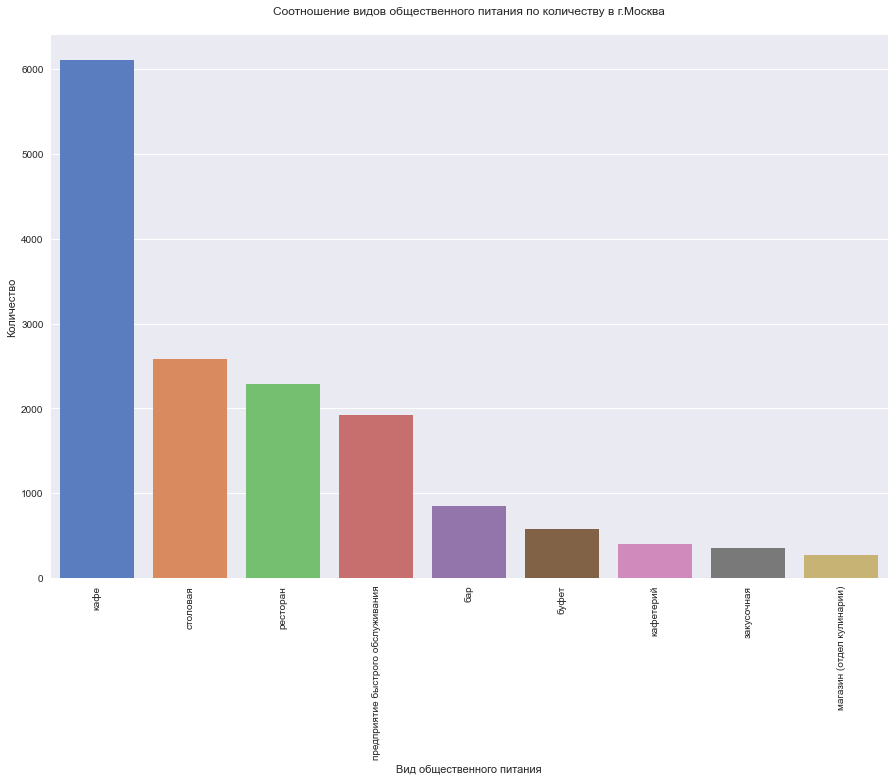

In [23]:
# Построим sns.countplot() из библиотеки seaborn:
plt.figure(figsize = (15,10))
sns.countplot(x = 'object_type', data = df, order = type_count['index'])
plt.title('Соотношение видов общественного питания по количеству в г.Москва', pad = 20)
plt.xlabel('Вид общественного питания')
plt.ylabel('Количество')
plt.xticks(rotation='90')
plt.show()



### *Вывод:*


*В г.Москва больше всех заведений общественного питания с типом 'Кафе': ~6000.*

*С типом: 'Столовая': ~2500,  'Ресторан': ~2200, 'Предприятие быстрого обслуживания': ~1900.*

*С типом: 'Бар': ~850, 'Буфет': ~600,  'Кафетерий' и 'Закусочная': ~400*

*Меньше всех заведений общественного питания с типом 'Отдел кулинарии'(в магазинах): ~300.*





2. **Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.**

Создадим сводную таблицу chain_type: сгруппируем данные по типу заведения и затем посчитаем количество сетевых и несетевых заведений в каждой группе.

In [24]:
# Создадим сводную таблицу:
chain_type = df.pivot_table(index = 'object_type', 
                            columns = 'chain', 
                            values = 'object_name', 
                            aggfunc = 'count',
                           margins = True)
# Переименуем столбец и строку, содержащие общее количество:
chain_type = chain_type.rename(index = {'All': 'total_amount'}, columns = {'All': 'total_amount'})
# Превратив мульти - индекс в более простой массив:
chain_type.columns = [''.join(x) for x in chain_type.columns.ravel()] 
# Проверим результат:
chain_type

,да,нет,total_amount
object_type,,,
бар,37,819,856
буфет,11,574,585
закусочная,56,304,360
кафе,1396,4703,6099
кафетерий,52,346,398
магазин (отдел кулинарии),78,195,273
предприятие быстрого обслуживания,791,1132,1923
ресторан,544,1741,2285
столовая,3,2584,2587


Сейчас построим график:

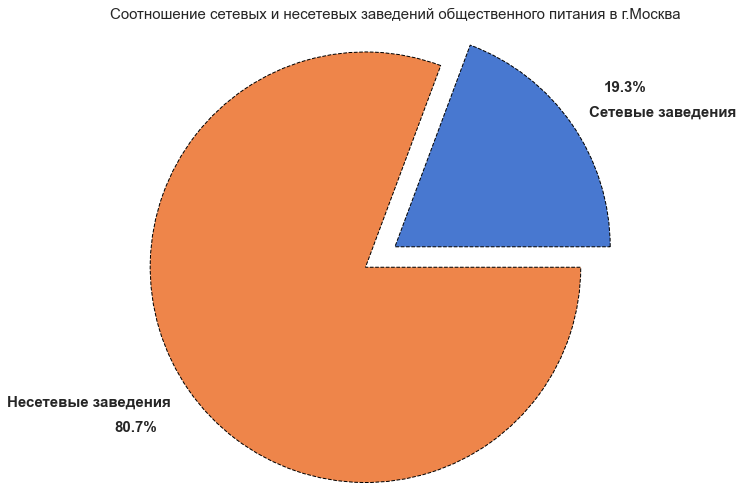

In [25]:
# На круговой диаграмме изобразим отношение сетевых и несетевых заведений:

vals = [2968, 12398]
labels = ['Сетевые заведения', 'Несетевые заведения']
textprops = {'fontsize': 15, 'fontweight': 'demi'}
explode = (0, 0.3)
fig , ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', pctdistance = 1.3, labeldistance = 1.1\
      , explode=explode, radius = 1.8, wedgeprops={'lw':1,'ls':'--','edgecolor':"k"},\
        textprops = textprops)
plt.title('Соотношение сетевых и несетевых заведений общественного питания в г.Москва', pad = 80, fontsize = 15)

plt.show()

### *Вывод:*

*В г.Москва, в основном, заведения общественного питания не являются сетевыми: ~ 80,7%. И только ~ 19,3% - являются сетевыми* 

3. Проверим для какого вида общественного питания характерно сетевое распространение. Построим график:

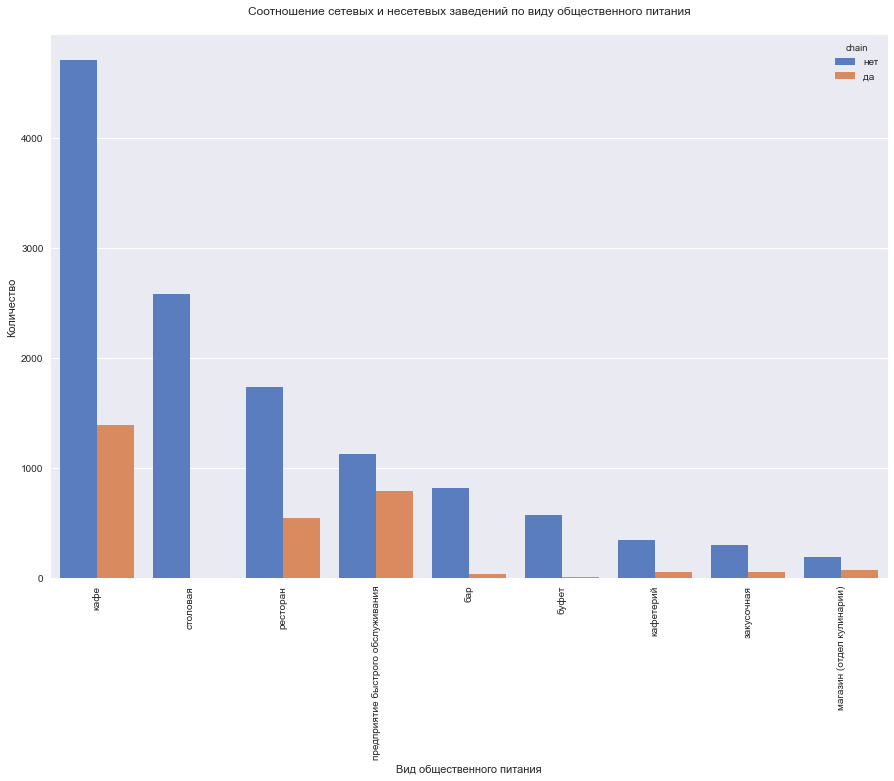

In [26]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'object_type', data = df, hue = 'chain', order = type_count['index'])
plt.title('Соотношение сетевых и несетевых заведений по виду общественного питания', pad = 20)
plt.xlabel('Вид общественного питания')
plt.ylabel('Количество')
plt.xticks(rotation='90')
plt.show()

### *Вывод*:

*Сетевое распространение характерно для всех типов заведений общественного питания. Но, в основном, для заведений типа: кафе, предприятие быстрого обслуживания, ресторан.*

3. Сейчас ответим на вопрос: что характерно для сетевых заведений (много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест)?

Создадим датафрейм df_chain_yes, который будет содержать информацию о всех сетевых заведениях:

In [27]:
# Отфильтруем строки начальной таблицы df: укажем df['chain'] == 'да':
df_chain_yes = df[df['chain'] == 'да']
df_chain_yes.tail(5)

,id,object_name,chain,object_type,address,number,object_name_new,street
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,шоколадница,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,шоколадница,"поселение Московский, Киевское шоссе, 22-й кил..."
15365,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,шоколадница,Ходынский бульвар


Создадим таблицу col, содержащую информацию о количестве заведений для каждой сети:

In [28]:
col = df_chain_yes.groupby('object_name_new').agg({'chain' : 'count'}).reset_index()
col.sort_values(by = 'chain', ascending = True).tail(10)

,object_name_new,chain
260,папа джонс,66
232,милти,79
323,суши wok,90
211,крошка картошка,96
166,домино'с пицца,98
337,теремок,109
118,бургер кинг,152
222,макдоналдс,173
32,kfc,178
379,шоколадница,183


Сейчас построим распределение количества заведений для каждой сети:

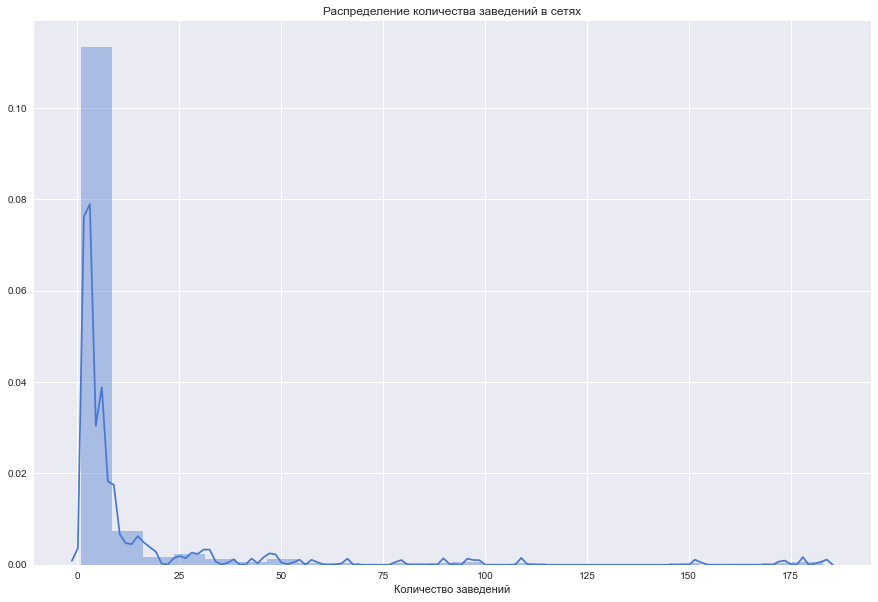

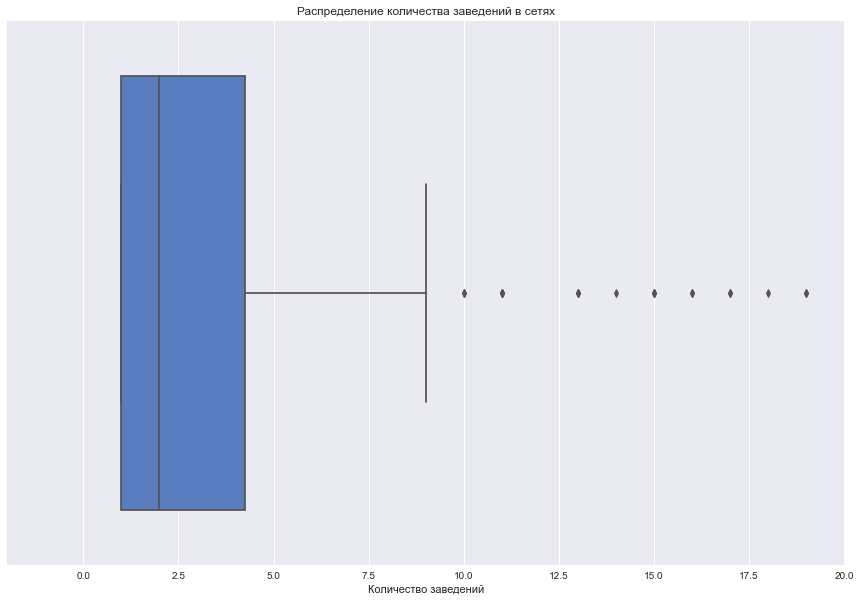

In [29]:
plt.figure(figsize = (15,10))
sns.distplot(col['chain'], bins = 24)
plt.title("Распределение количества заведений в сетях")
plt.xlabel('Количество заведений')
plt.show()

# Построим "ящик с усами"
plt.figure(figsize = (15,10))
sns.boxplot(x = 'chain', data = col)
plt.xlim(-2, 20)
plt.title("Распределение количества заведений в сетях")
plt.xlabel('Количество заведений')
plt.show()


*Распределение данных имеет сильно выраженную положительную ассиметрию. На графике хорошо заметен длинный хвост высоких значений*

*В некоторых сетях количество открытых заведений превышает 100 -150, например: "Макдоналдс" ~172 заведения, "Шоколадница" ~ 183, kfc ~ 177 и др.*

Вычислим 90, 95, 99 перцентиль, медиану и среднее арифметическое для нашего распределения:

In [30]:
np.percentile(col['chain'], [90, 95, 99])

array([ 13.  ,  32.  , 112.87])

In [31]:
col.agg({'chain': ['median', 'mean']})

,chain
median,2.000000
mean,7.571429


*Значение медианы ~ 2. Отсюда следует, что в 50% сетей количество заведений не превышает 2.*

*Не более чем в 10% сетей количество заведений превышает 13.*

*Не более 5% сетей имеют количество заведений, превышающих 32 и только в 1% сетей - превышает 115.*



Выведем на экран названия сетей, в которых количество заведений больше 115:

In [32]:
argument = np.percentile(col['chain'], 99)
col[col['chain'] > argument]

,object_name_new,chain
32,kfc,178
118,бургер кинг,152
222,макдоналдс,173
379,шоколадница,183


Всеми известные сети: шоколадница, макдоналдс, бургер кинг, kfc.  	

Сейчас посмотрим на распределение данных посадочных мест в сетевых заведениях:

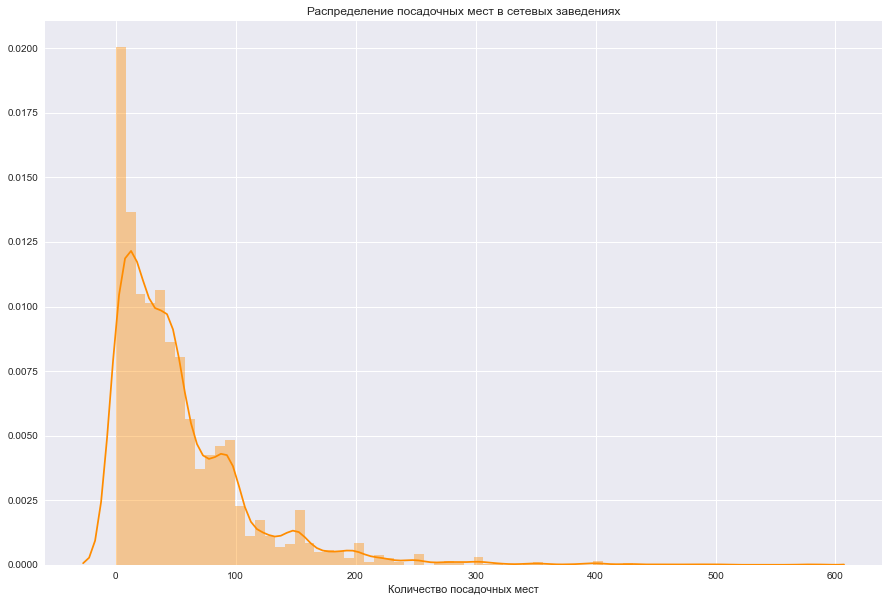

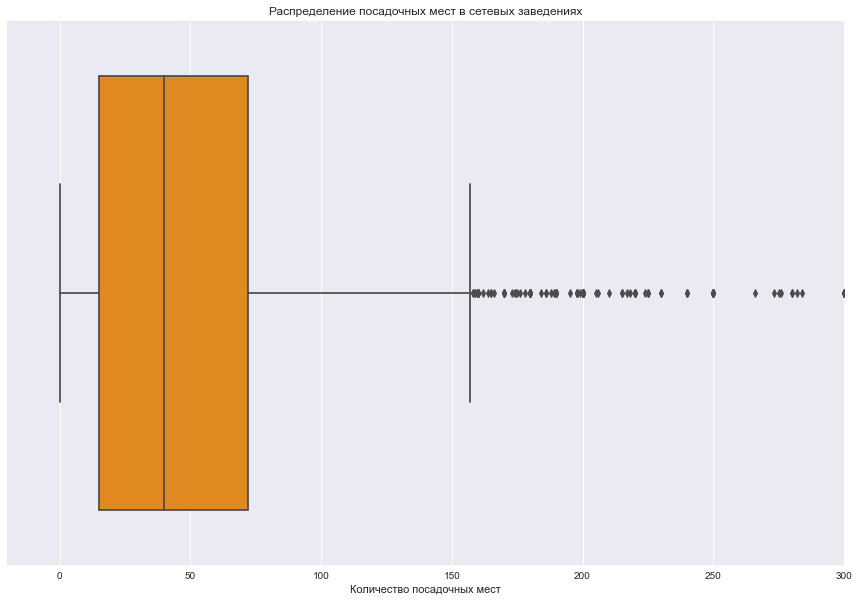

In [33]:
plt.figure(figsize = (15,10))
sns.distplot(df_chain_yes['number'], bins = 70, color = 'darkorange')
plt.title("Распределение посадочных мест в сетевых заведениях")
plt.xlabel('Количество посадочных мест')
plt.show()


# Построим "ящик с усами"
plt.figure(figsize = (15,10))
sns.boxplot(x = 'number', data = df_chain_yes, color = 'darkorange')
plt.xlim(-20, 300)
plt.title("Распределение посадочных мест в сетевых заведениях")
plt.xlabel('Количество посадочных мест')
plt.show()




*Распределение данных посадочных мест в сетевых заведениях также имеет сильно выраженную положительную ассиметрию: заметен длинный хвост высоких значений.*

*В некоторых заведениях количество посадочных мест превышает 400.*

Вычислим 90, 95, 99 перцентиль, медиану и среднее арифметическое для нашего распределения:

In [34]:
np.percentile(df_chain_yes['number'], [90, 95, 99])


array([120.  , 158.65, 275.33])

In [35]:
df_chain_yes.agg({'number' : ['mean', 'median']})

,number
mean,52.919811
median,40.000000


*В 50% заведений число посадочных мест не превышает 40. В остальных 50% число посадочных мест не меньше 40.*

*Не более 10% заведений имеют число посадочных мест больше 120.*

*Не более 5% заведений имеют число посадочных мест больше 160.*

*И только не более 1% заведений - больше 280.*

### *Вывод:*

*Из всего вышесказанного следует, что для сетевых заведений характерно: много заведений с относительно небольшим числом посадочных мест в каждом.*

*Думаю, что число посадочных мест для конкретного заведения зависит еще и от места, в котором оно расположено.*

Для сетей общественного питания характерно наличие нескольких заведений в конкретном городе, стране, мире. Например, "Бургер Кинг", "Макдоналдс", "KFC" - крупные сети. Их бренд знают во всем мире.

Разделим сети Москвы на две группы: 

- крупные с раскрученным брендом;

- мелкие, развивающиеся сети.

Количество заведений в мелких развивающихся сетях в Москве: от 2 до 13. 

Количество заведений в крупных сетях с раскрученным брендом составляет от 13 и выше. 

Выведем на экран таблицу с названием бренда сети и количеством заведений в каждой:

In [36]:
argument_1 = np.percentile(col['chain'], 90)
seti = col[col['chain'] >= argument_1].sort_values(by = 'chain', ascending = False)
seti = seti.rename(columns = ({'object_name_new': 'object_name', 'chain': 'object_count'}))
seti

,object_name,object_count
379,шоколадница,183
32,kfc,178
222,макдоналдс,173
118,бургер кинг,152
337,теремок,109
166,домино'с пицца,98
211,крошка картошка,96
323,суши wok,90
232,милти,79
260,папа джонс,66


Например, в г.Москва сеть "Шоколадница" имеет 183 заведения, "KFC" - 178, "Макдоналдс" - 173, "Бургер Кинг" - 152 и т.д. Чем более узнаваемый бренд у сети, тем больше заведений имеет в Москве.

Медианное количество посадочных мест в сетевых заведениях: ~40. То есть:

В 50% всех заведений количество посадочных мест лежит в диапазоне от 0 до 40.

В остальных 50% заведениях: количество посадочных мест составляет:  40 - 300. 


4.	Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. И ответим на вопрос:
какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

Сразу перейдем к построению графика: "ящика с усами" и диаграммы рассеяния для каждого вида данных(stripplot()):

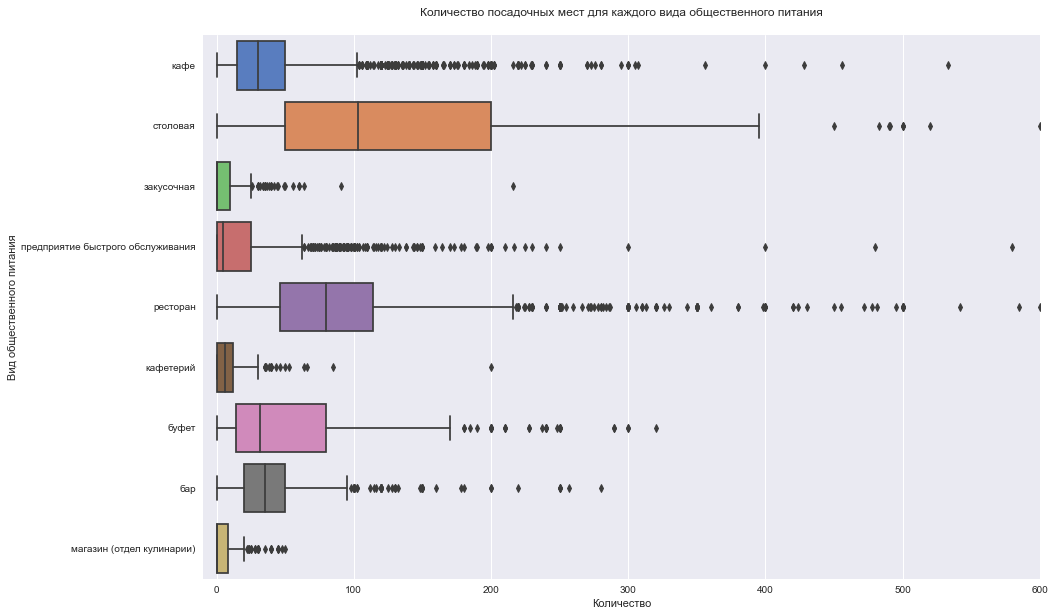

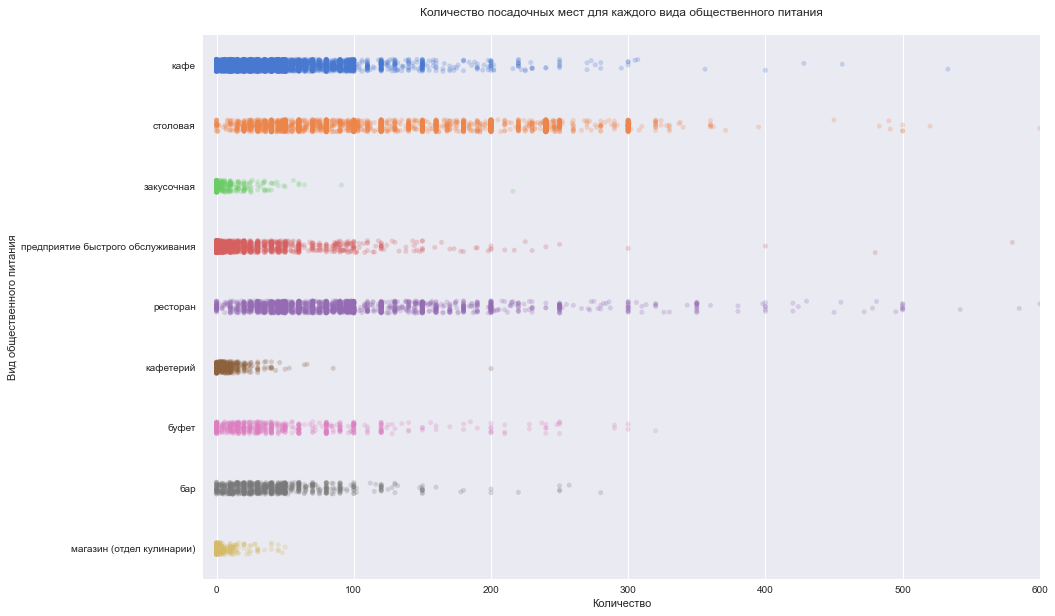

In [37]:
plt.figure(figsize = (15,10))
sns.boxplot(y = 'object_type', x = 'number', data = df)
plt.title('Количество посадочных мест для каждого вида общественного питания', pad = 20)
plt.ylabel('Вид общественного питания')
plt.xlabel('Количество')
plt.xlim(-10,600)
plt.show()

plt.figure(figsize = (15,10))
sns.stripplot(y = 'object_type', x = 'number', data = df, alpha = 0.25)
plt.title('Количество посадочных мест для каждого вида общественного питания', pad = 20)
plt.ylabel('Вид общественного питания')
plt.xlabel('Количество')
plt.xlim(-10,600)
plt.show()



Выведем таблицу со значением медианы и среднего арифметического для каждого типа заведения:

In [38]:
number_mean = round(df.groupby('object_type').agg({'number': ['mean', 'median']}), 0)
number_mean.T

object_type     бар  буфет  закусочная  кафе  кафетерий  \
number mean    43.0   51.0         8.0  40.0        9.0   
       median  35.0   32.0         0.0  30.0        6.0   

object_type    магазин (отдел кулинарии)  предприятие быстрого обслуживания  \
number mean                          6.0                               21.0   
       median                        0.0                                5.0   

object_type    ресторан  столовая  
number mean        97.0     130.0  
       median      80.0     103.0

Также вычислим перцентили: 90, 95, 99:

In [39]:
# Нужно фильтровать данные, подставляя нужный тип:
r = df[df['object_type'] == 'столовая'].copy()
np.percentile(r['number'], [90,95,99])

array([240. , 289.4, 330. ])

### *Вывод:*

*Все распределения данных имеют положительную ассиметрию: перекос вправо. Что говорит о наличии длинного хвоста высоких значений. Возможно есть выбросы.*

*КАФЕ: среднее количество посадочных мест ~30. Для 95% заведений число не превышает 100. И лишь для 1% число мест превышает 190.*

*СТОЛОВАЯ: среднее количество посадочных мест ~103. Для 95% заведений число не превышает 300. И лишь для 1% число мест превышает 330.*

*ЗАКУСОЧНАЯ: 50% заведений не имеют посадочных мест. Остальные 50% имеют  небольшое количество. Не более в 10% число мест превышает 22. Не более в 5% - превышает 35.И лишь для 1% число мест превышает 60.*

*ПРЕДПРИЯТИЕ БЫСТРОГО ОБСЛУЖИВАНИЯ: среднее количество посадочных мест ~5.  Не более в 10% число мест превышает 60. Не более в 5% - превышает 92.И лишь для 1% число мест превышает 170.*

*РЕСТОРАН: среднее количество посадочных мест ~80.  Не более в 10% число мест превышает 180. Не более в 5% - превышает 250.И лишь для 1% число мест превышает 500.*

*КАФЕТЕРИЙ: среднее количество посадочных мест ~6.  Не более в 10% число мест превышает 21. Не более в 5% - превышает 30.И лишь для 1% число мест превышает 50.*

*БУФЕТ: среднее количество посадочных мест ~32.  Не более в 10% число мест превышает 120. Не более в 5% - превышает 170. И лишь для 1% число мест превышает 250.*

*БАР: среднее количество посадочных мест ~35.  Не более в 10% число мест превышает 85. Не более в 5% - превышает 100. И лишь для 1% число мест превышает 180.*

*МАГАЗИН(ОТДЕЛ КУЛИНАРИИ): 50% заведений не имеют посадочных мест. Остальные 50% имеют  небольшое количество.  Не более в 10% число мест превышает 15. Не более в 5% - превышает 30. И лишь для 1% число мест превышает 40.*

*Итак, самое большое число посадочных мест предоставляет заведение общественного питания с типом: столовая.*

5.	Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

Выведем на экран таблицу с данными df (информация о заведениях):

In [40]:
df.head(5)


,id,object_name,chain,object_type,address,number,object_name_new,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель,Абрамцевская улица


Сформируем таблицу "Топ-10 улиц г.Москва по количеству общественного питания"

In [41]:
street_table = df[df['street'] != ''].groupby('street').agg({'object_name': 'count'})\
                                     .sort_values(by = 'object_name', ascending = False).reset_index()
street_table_result = street_table.loc[0:9]
street_table_result.sort_values(by = 'object_name', ascending = True)

,street,object_name
9,Кировоградская улица,110
8,Каширское шоссе,112
7,Кутузовский проспект,114
6,проспект Вернадского,132
5,Ленинский проспект,147
4,Варшавское шоссе,161
3,Пресненская набережная,167
2,Ленинградский проспект,171
1,Профсоюзная улица,182
0,проспект Мира,204


*Больше всех заведений общественного питания в г.Москва расположено на ул.Проспект Мира: ~ 200.*

*А также Профсоюзной :~180, на Ленинградском проспекте: ~170.*

*Скорее всего данные улицы имеют большую протяженность.*

Выясним в каких районах г.Москвы расположены данные улицы.

Обратимся к внешней информации, а именно к сайту [OpenStreetMap](https://www.openstreetmap.org/)

Создадим функцию, которая будет отправлять запрос на указанный выше сайт и сохранять в словарь название района.

Для того, чтобы понять какого вида должен быть запрос, зайдем на сайт в панель разработчика(F12)\вкладка network. Далее на сайте введем адрес в поле для поиска. Нас интересует GET - запрос.

В результате GET - запрос должен быть вида: 'https://www.openstreetmap.org/geocoder/search_osm_nominatim?query=адрес'

После вопросительного знака изменяемая часть, т.е. если мы будем передавать в query наш адрес, мы будем получать нужную нам информацию.

Для того, чтобы нам сохранить название района воспользуемся возможностями библиотеки BeautifulSoup и вкладкой ELEMENTS на сайте в панели разработчика.

В результате: нужная нам информация содержится в теге <a 'class': 'set_position'>.

И еще, передаваемая информация должна иметь вид: например, Москва, проспект Мира. Поэтому преобразуем данные в столбце street в street_table: добавим название города:

In [42]:
street_table_result['street'] = "Москва, " + street_table_result['street']
street_table_result

C:\Users\PPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,street,object_name
0,"Москва, проспект Мира",204
1,"Москва, Профсоюзная улица",182
2,"Москва, Ленинградский проспект",171
3,"Москва, Пресненская набережная",167
4,"Москва, Варшавское шоссе",161
5,"Москва, Ленинский проспект",147
6,"Москва, проспект Вернадского",132
7,"Москва, Кутузовский проспект",114
8,"Москва, Каширское шоссе",112
9,"Москва, Кировоградская улица",110


In [43]:
# Подключим библиотеки:
import requests
from bs4 import BeautifulSoup
content = [] # создаем пустой список
query = street_table_result['street'] # передаем query столбец
    # создаем цикл: перебираем нужные нам адреса:
for i in query:
        # сохраняем get запрос в переменную response; адрес i будем передавать в query={}.format(i)
        response = requests.get('https://www.openstreetmap.org/geocoder/search_osm_nominatim?query={}'.format(i))
        # к тексту ответа запроса применим парсер 'lxml', создав дерево сайта с помощью BeautifulSoup:
        soup = BeautifulSoup(response.text, 'lxml')
        # находим нужную нам информацию
        table = soup.find_all('a', attrs = {'class': 'set_position'})
        # сохраняем текст в список:
        for y in soup.find_all('a', attrs = {'class': 'set_position'}):
            content.append(y.text) 
    

Сохраняем полученную информацию в датафрейм:

In [44]:
new_top = pd.DataFrame()
new_top['content'] = content
new_top['content'].values

array(['Проспект Мира, улица Гиляровского, Мещанский район, Центральный административный округ, Москва, Центральный федеральный округ, 129090, Россия',
       'проспект Мира, Мещанский район, Москва, Центральный административный округ, Москва, Центральный федеральный округ, 129110, Россия',
       'проспект Мира, Алексеевский, Алексеевский район, Северо-Восточный административный округ, Москва, Центральный федеральный округ, 129085, Россия',
       'проспект Мира, Алексеевский, Алексеевский район, Северо-Восточный административный округ, Москва, Центральный федеральный округ, 129366, Россия',
       'проспект Мира, Ростокино, район Ростокино, Северо-Восточный административный округ, Москва, Центральный федеральный округ, 129226, Россия',
       'проспект Мира, Мещанский район, Центральный административный округ, Москва, Центральный федеральный округ, 129110, Россия',
       'проспект Мира, Напрудное, Центральный административный округ, Москва, Центральный федеральный округ, 129110, Рос

Создадим в датафрейме new_top столбец area, который будет содержать информацию о районе. 

Название района из данных столбца 'content' будем извлекать с помощью регулярного выражения. И с помощью строковых методов str.findall() и str.extract():

In [45]:
# Пишем рег.выражение, которое сохраняем в переменную pattern:
pattern = ',\ ([\w\-\w]+ район|район [\w\-\w\s\w]+)\,'
new_top['area'] = new_top['content'].str.findall(pat = pattern)
new_top['area'] = new_top['content'].str.extract(pat = pattern)
new_top.sample(20)

,content,area
63,"Кутузовский проспект, Дорогомилово, район Доро...",район Дорогомилово
26,"Ленинградский проспект, район Аэропорт, Северн...",район Аэропорт
48,"Ленинский проспект, район Тёплый Стан, Юго-Зап...",район Тёплый Стан
5,"проспект Мира, Мещанский район, Центральный ад...",Мещанский район
69,"Каширское шоссе, район Москворечье-Сабурово, Ю...",район Москворечье-Сабурово
3,"проспект Мира, Алексеевский, Алексеевский райо...",Алексеевский район
80,"Кировоградская улица, район Чертаново Централь...",район Чертаново Центральное
33,"Варшавское шоссе, Бутово, район Южное Бутово, ...",район Южное Бутово
74,"Каширское шоссе, Орехово-Борисово, район Орехо...",район Орехово-Борисово Северное
25,"Ленинградский проспект, район Беговой, Северны...",район Беговой


В столбце, содержащий название района есть пропущенные значения. Выведем их на экран:

In [46]:
new_top[new_top['area'].isna()].sort_values(by ='content').values

array([['Ленинградский проспект, Ходынское поле, Северный административный округ, Москва, Центральный федеральный округ, 125190, Россия',
        nan],
       ['Ленинский проспект, Тропарёво-Никулино, Западный административный округ, Москва, Центральный федеральный округ, 117133, Россия',
        nan],
       ['Ленинский проспект, Тропарёво-Никулино, Западный административный округ, Москва, Центральный федеральный округ, 119606, Россия',
        nan],
       ['Симферопольское шоссе, городской округ Щербинка, Новомосковский административный округ, Москва, Центральный федеральный округ, 114178, Россия',
        nan],
       ['Симферопольское шоссе, городской округ Щербинка, Новомосковский административный округ, Москва, Центральный федеральный округ, 142171, Россия',
        nan],
       ['проспект Мира, Напрудное, Центральный административный округ, Москва, Центральный федеральный округ, 129063, Россия',
        nan],
       ['проспект Мира, Напрудное, Центральный административный округ

В полученном контенте не оказалось названия района. Также попала информация, не относящая к г.Москва. Поэтому данные строки не будем брать во внимание в дальнейшей работе.

Добавим название округа:

In [47]:
# Создаем новый столбец, с помощью str.findall находим нужный фрагмент текста
# Затем с помощью str.extract создаем строку из нужного фрагмента
pattern = ',\ ([\w+\-\w+]* административный округ|Московская область)\,'
new_top['okrug'] = new_top['content'].str.findall(pat = pattern)
new_top['okrug'] = new_top['content'].str.extract(pat = pattern)
new_top.sample(20)

,content,area,okrug
73,"Каширское шоссе, Нагатино-Садовники, район Наг...",район Нагатино-Садовники,Южный административный округ
44,"Ленинский проспект, Ломоносовский, Ломоносовск...",Ломоносовский район,Юго-Западный административный округ
46,"Ленинский проспект, район Тёплый Стан, Юго-Зап...",район Тёплый Стан,Юго-Западный административный округ
43,"Ленинский проспект, Третье Транспортное кольцо...",Донской район,Южный административный округ
12,"Профсоюзная улица, Академический, Академически...",Академический район,Юго-Западный административный округ
33,"Варшавское шоссе, Бутово, район Южное Бутово, ...",район Южное Бутово,Юго-Западный административный округ
55,"проспект Вернадского, Ломоносовский, Ломоносов...",Ломоносовский район,Юго-Западный административный округ
50,"Ленинский проспект, Обручевский район, Юго-Зап...",Обручевский район,Юго-Западный административный округ
16,"Профсоюзная улица, район Ясенево, Юго-Западный...",район Ясенево,Юго-Западный административный округ
81,"Кировоградская улица, район Чертаново Централь...",район Чертаново Центральное,Южный административный округ


In [48]:
# Исключаем из датафрейма new_top строки с пропущенными значениями:
new_top = new_top[~new_top['area'].isna()].sort_values(by ='content')
# В столбце content оставляем только название улицы:
# Используем метод str.split('\,') и берем только индекс str[0] и перезаписываем данные в столбце:
new_top['content'] = new_top['content'].str.split('\,').str[0]
new_top.head(20)

,content,area,okrug
33,Варшавское шоссе,район Южное Бутово,Юго-Западный административный округ
39,Варшавское шоссе,район Северное Бутово,Юго-Западный административный округ
37,Варшавское шоссе,Донской район,Южный административный округ
36,Варшавское шоссе,район Нагатино-Садовники,Южный административный округ
38,Варшавское шоссе,район Чертаново Южное,Юго-Западный административный округ
35,Варшавское шоссе,район Чертаново Южное,Южный административный округ
34,Варшавское шоссе,район Чертаново Южное,Южный административный округ
40,Варшавское шоссе,район Чертаново Южное,Южный административный округ
72,Каширское шоссе,район Нагатино-Садовники,Южный административный округ
73,Каширское шоссе,район Нагатино-Садовники,Южный административный округ


Преобразуем текст в датафрейме new_top к одному виду: приведем к нижнему регистру

In [49]:
# Приводим к нижнему регистру:
new_top['content'] = new_top['content'].str.lower()
new_top['area'] = new_top['area'].str.lower()
new_top['okrug'] = new_top['okrug'].str.lower()
new_top

,content,area,okrug
33,варшавское шоссе,район южное бутово,юго-западный административный округ
39,варшавское шоссе,район северное бутово,юго-западный административный округ
37,варшавское шоссе,донской район,южный административный округ
36,варшавское шоссе,район нагатино-садовники,южный административный округ
38,варшавское шоссе,район чертаново южное,юго-западный административный округ
...,...,...,...
1,проспект мира,мещанский район,центральный административный округ
5,проспект мира,мещанский район,центральный административный округ
7,проспект мира,район ростокино,северо-восточный административный округ
4,проспект мира,район ростокино,северо-восточный административный округ


Удалим в датафрейме дубликаты:

In [50]:
# Удаляем дубликаты:
new_top = new_top.drop_duplicates().reset_index(drop = True)
# Исключаем образовавшиеся пропуски:
new_top[~new_top['okrug'].isna()].sort_values(by='content')

,content,area,okrug
0,варшавское шоссе,район южное бутово,юго-западный административный округ
1,варшавское шоссе,район северное бутово,юго-западный административный округ
2,варшавское шоссе,донской район,южный административный округ
3,варшавское шоссе,район нагатино-садовники,южный административный округ
4,варшавское шоссе,район чертаново южное,юго-западный административный округ
5,варшавское шоссе,район чертаново южное,южный административный округ
6,каширское шоссе,район нагатино-садовники,южный административный округ
7,каширское шоссе,нагорный район,южный административный округ
8,каширское шоссе,район орехово-борисово южное,южный административный округ
9,каширское шоссе,район орехово-борисово северное,южный административный округ


Построим график 'Топ-10 улиц г.Москва по количеству общественного питания':

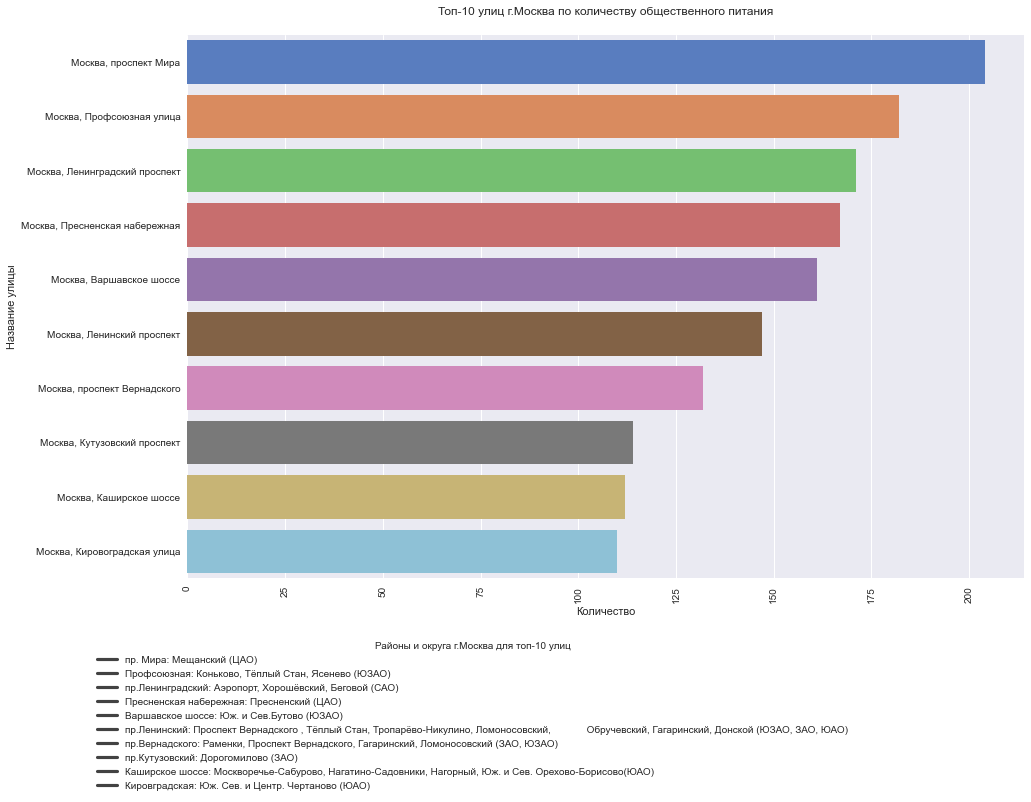

In [51]:
# Построим sns.barplot() из библиотеки seaborn:
plt.figure(figsize = (15,10))
sns.barplot(y = 'street', x = 'object_name', data = street_table_result)
plt.title('Топ-10 улиц г.Москва по количеству общественного питания', pad = 20)
plt.ylabel('Название улицы')

plt.legend((['пр. Мира: Мещанский (ЦАО)', 'Профсоюзная: Коньково, Тёплый Стан, Ясенево (ЮЗАО)',\
            'пр.Ленинградский: Аэропорт, Xорошёвский, Беговой (САО)','Пресненская набережная: Пресненский (ЦАО)',\
            'Варшавское шоссе: Юж. и Сев.Бутово (ЮЗАО)',\
            'пр.Ленинский: Проспект Вернадского , Тёплый Стан, Тропарёво-Никулино, Ломоносовский, \
            Обручевский, Гагаринский, Донской (ЮЗАО, ЗАО, ЮАО)',\
            'пр.Вернадского: Раменки, Проспект Вернадского, Гагаринский, Ломоносовский (ЗАО, ЮЗАО)', \
            'пр.Кутузовский: Дорогомилово (ЗАО)',\
            'Каширское шоссе: Mоскворечье-Cабурово, Нагатино-Садовники, Нагорный, Юж. и Сев. Орехово-Борисово(ЮАО)',\
           'Кировградская: Юж. Сев. и Центр. Чертаново (ЮАО)']),
     title = 'Районы и округа г.Москва для топ-10 улиц',
          bbox_to_anchor = (0.8, -0.1))
plt.xlabel('Количество')
plt.xticks(rotation='90')
plt.show()

### *Вывод:*

*Перед нами список районов, в которых расположены топ-10 улиц г.Москва по количеству общественного питания.*

*Улицы имеют большую протяженность и охватывают несколько районов.*

*Данные улицы расположены в округах: центральный, западный, юго-западный, южный, северный.*

*Больше всех заведений общественного питания расположено на пр.Мира в Центральном административном округе: ~200.*

6.	Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

Выведем на экран датафрейм df:

In [52]:
df.head(5)

,id,object_name,chain,object_type,address,number,object_name_new,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель,Абрамцевская улица


Итак, чтобы найти число улиц с одним объектом общественного питания, сгруппируем данные по улице, найдем количество на каждой. И выведем на экран нужные улицы = 1. Найдем количество:

In [53]:
street_one = df[df['street'] != ''].groupby('street').agg({'object_name': 'count'}).reset_index()
street_one = street_one[street_one['object_name'] == 1]
street_one['street'].count()

628

*В итоге получили:  на 628 улицах г.Москвы расположено одно заведение общественного питания.*

Сейчас выведем на экран районы. Поступим также как и в предыдущем случае. Обратимся к данным сайта OpenStreetMap и воспользуемся уже созданной функцией, которая будет отправлять запрос на указанный выше сайт и сохранять в словарь название района:

In [54]:
# Добавим к названию улицы название города Москва, это нужно для формирования нужного запроса на OpenStreetMap
street_one['street'] = "Москва, " + street_one['street']
street_one.head()

,street,object_name
2,"Москва, 1-й Балтийский переулок",1
3,"Москва, 1-й Басманный переулок",1
4,"Москва, 1-й Ботанический проезд",1
7,"Москва, 1-й Вешняковский проезд",1
9,"Москва, 1-й Голутвинский переулок",1


Формируем запрос:

In [55]:
content = [] # создаем пустой список
query = street_one['street'] # передаем query столбец
    # создаем цикл: перебираем нужные нам адреса:
for i in query:
        # сохраняем get запрос в переменную response; адрес i будем передавать в query={}.format(i)
        response = requests.get('https://www.openstreetmap.org/geocoder/search_osm_nominatim?query={}'.format(i))
        # к тексту ответа запроса применим парсер 'lxml', создав дерево сайта с помощью BeautifulSoup:
        soup = BeautifulSoup(response.text, 'lxml')
        # находим нужную нам информацию
        table = soup.find_all('a', attrs = {'class': 'set_position'})
        # сохраняем текст в список:
        for y in soup.find_all('a', attrs = {'class': 'set_position'}):
            content.append(y.text) 

In [56]:
# Сохраняем данные из полученного списка в датафрейм:
new_one = pd.DataFrame()
new_one['content'] = content
new_one['content'].values

array(['1-й Балтийский переулок, район Аэропорт, Северный административный округ, Москва, Центральный федеральный округ, 125315, Россия',
       '1-й Балтийский переулок, Часовая улица, Аэропорт, район Аэропорт, Северный административный округ, Москва, Центральный федеральный округ, 125993, Россия',
       '1-й Басманный переулок, Басманный район, Москва, Центральный административный округ, Москва, Центральный федеральный округ, 178855, Россия',
       ...,
       'шоссе Фрезер, Рогожская слобода, Нижегородский район, Юго-Восточный административный округ, Москва, Центральный федеральный округ, 109202, Россия',
       'шоссе Фрезер, Рогожская слобода, Нижегородский район, Юго-Восточный административный округ, Москва, Центральный федеральный округ, 109202, Россия',
       'Шоссе Фрезер, шоссе Фрезер, Рогожская слобода, Нижегородский район, Юго-Восточный административный округ, Москва, Центральный федеральный округ, 109202, Россия'],
      dtype=object)

Добавляем к датафрейму new_one столбец area - название района, поселения, городского округа:

In [57]:
pattern = ',\ ([\w\-\w]+ (район|городской округ|городок|поселение|посёлок|городок|поле)|(район|городской округ|поселение|посёлок) [\w\-\w\s\w]*)\,'
new_one['area'] = new_one['content'].str.findall(pat = pattern)
new_one['area'] = new_one['content'].str.extract(pat = pattern)
new_one.sample(20)

,content,area
1027,"Триумфальная площадь, 49, Тверской район, Цент...",Тверской район
1200,"Никулинская улица, Очаково, Западный администр...",NaN
155,"2-я улица Марьиной Рощи, Марьина Роща, район М...",район Марьина Роща
1042,"Учинская улица, Зелёный городок, Кудринка, Пуш...",Зелёный городок
639,"Малый Знаменский переулок, 31, Старое Ваганько...",NaN
552,"Кирпичная улица, Скобянка, Сергиев Посад, Серг...",Сергиево-Посадский городской округ
688,"Молодёжная улица, Машкино, городской округ Хим...",городской округ Химки
479,"Заводской проезд, Балашиха-3, Балашиха, городс...",городской округ Балашиха
372,"Верхний Золоторожский переулок, Квартал Свобод...",NaN
474,"Жигулёвская улица, Чехов, городской округ Чехо...",городской округ Чехов


Заменим пропуски на пустое значение:

In [58]:
new_one['area'] = new_one['area'].fillna('')

Добавим столбец с названием округа: с помощью регулярного выражения найдем в столбце content название округа и сохраним его в новый столбец okrug:

In [59]:
pattern = ',\ ([\w+\-\w+]* административный округ|Московская область)\,'
new_one['okrug'] = new_one['content'].str.findall(pat = pattern)
new_one['okrug'] = new_one['content'].str.extract(pat = pattern)
new_one.sample(5)

,content,area,okrug
1481,"улица Рудневой, Микрорайон Салтыковка, Балаших...",городской округ Балашиха,Московская область
1243,"улица Академика Семёнова, Чернево, район Южное...",район Южное Бутово,Юго-Западный административный округ
657,"Мамоновский переулок, 49, Тверской район, Цент...",Тверской район,Центральный административный округ
810,"Прибрежный проезд, район Ховрино, Северный адм...",район Ховрино,Северный административный округ
1505,"улица Фадеева, Апрелевка, Наро-Фоминский город...",Наро-Фоминский городской округ,Московская область


Проверим, если ли в столбце okrug пропущенные значения:

In [60]:
new_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1533 non-null   object
 1   area     1533 non-null   object
 2   okrug    1530 non-null   object
dtypes: object(3)
memory usage: 36.1+ KB


В трех ячейках имеются пропущенные значения. По отношению к общему числу строк в датафрейме процент очень не велик. Оставляем строки.

Преобразуем данные в таблице следующим образом: в столбце content оставляем только название улицы, во всей таблице данные приводим к нижнему регистру, удалим дубликаты:

In [61]:
# Оставляем название улицы в первом столбце:
new_one['content'] = new_one['content'].str.split('\,').str[0]
# Приводим к нижнему регистру данные в столбцах area и okrug:
new_one['okrug'] = new_one['okrug'].str.lower()
new_one['area'] = new_one['area'].str.lower()
# Удаляем дубликаты и меняем индексы в таблице, чтобы счет был последовательный:
new_one = new_one.drop_duplicates().reset_index(drop = True)
new_one.sample(10)

,content,area,okrug
672,Хавская улица,даниловский район,южный административный округ
405,Малый Конюшковский переулок,,центральный административный округ
137,7-й Ростовский переулок,,центральный административный округ
928,улица Ремизова,нагорный район,южный административный округ
939,Улица Рокотова,район ясенево,юго-западный административный округ
373,Кунцевская улица,,западный административный округ
675,Хилков переулок,район хамовники,центральный административный округ
535,Радужная улица,,троицкий административный округ
436,Молодёжная улица,поселение кокошкино,новомосковский административный округ
21,1-й Монетчиковский переулок,район замоскворечье,центральный административный округ


Сейчас сгруппируем данные таблицы new_one по округу и найдем количество улиц в каждом:

In [62]:
okrug_one = new_one.groupby('okrug').agg({'content': 'count'}).reset_index()
# Переименуем столбец:
okrug_one = okrug_one.rename(columns = {'content': 'street_count'})
okrug_one.sort_values(by = 'street_count', ascending = False)

,okrug,street_count
3,московская область,242
9,центральный административный округ,221
0,восточный административный округ,80
6,северо-восточный административный округ,72
10,юго-восточный административный округ,69
5,северный административный округ,62
1,западный административный округ,54
4,новомосковский административный округ,43
7,северо-западный административный округ,41
12,южный административный округ,40


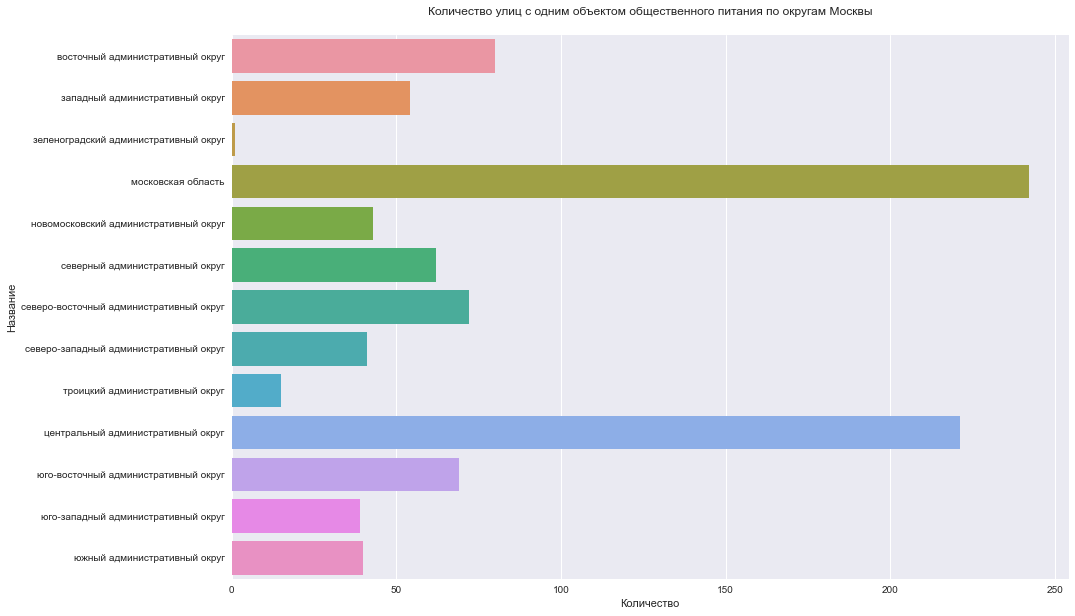

In [63]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'okrug', x = 'street_count', data = okrug_one)
plt.title('Количество улиц с одним объектом общественного питания по округам Москвы', pad = 20)
plt.ylabel('Название')
plt.xlabel('Количество')
plt.show()

### *Вывод:*

*Больше всего улиц с одним объектом общественного питания находится в центральном административном округе: ~200 и в Московской области.*

7.	Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Ответим на вопрос: какие закономерности можно выявить?

Выведем на экран таблицу "Топ-10 улиц г.Москва по количеству посадочных мест":

In [64]:
street_table_result

,street,object_name
0,"Москва, проспект Мира",204
1,"Москва, Профсоюзная улица",182
2,"Москва, Ленинградский проспект",171
3,"Москва, Пресненская набережная",167
4,"Москва, Варшавское шоссе",161
5,"Москва, Ленинский проспект",147
6,"Москва, проспект Вернадского",132
7,"Москва, Кутузовский проспект",114
8,"Москва, Каширское шоссе",112
9,"Москва, Кировоградская улица",110


Сейчас отфильтруем указанные улицы в таблице df. Для этого создадим список содержащий название улиц и применим метод query() к столбцу street:

In [65]:
# Создаем список:
list_ = ['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная',\
        'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект', \
         'Каширское шоссе', 'Кировоградская улица']

In [66]:
street_top = df.query('street in @list_')
street_top.sample(5)

,id,object_name,chain,object_type,address,number,object_name_new,street
14750,214545,les,нет,предприятие быстрого обслуживания,"город Москва, Пресненская набережная, дом 12",4,les,Пресненская набережная
11954,176325,ливан-хаус,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0,ливан-хаус,Кировоградская улица
9069,19721,комбинат питания мирэа,нет,столовая,"город Москва, проспект Вернадского, дом 78, ст...",200,комбинат мирэа,проспект Вернадского
603,24612,южное,нет,ресторан,"город Москва, Ленинский проспект, дом 87",80,южное,Ленинский проспект
12778,198860,риоба,нет,кафе,"город Москва, проспект Мира, дом 211, корпус 1",20,риоба,проспект Мира


Построим распределение данных:

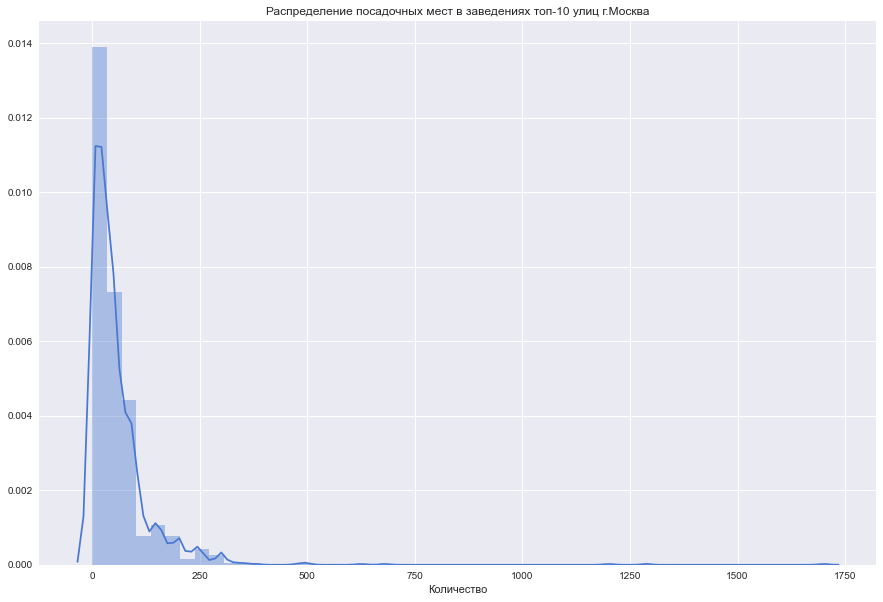

In [67]:
plt.figure(figsize = (15,10))
sns.distplot(street_top['number'], bins = 50)
plt.title('Распределение посадочных мест в заведениях топ-10 улиц г.Москва')
plt.xlabel('Количество')
plt.show()

*Распределение имеет положительную ассиметрию: наблюдается перекос вправо и очень длинный хвост высоких значений.*

*На графике видно, что в некоторых заведениях количество посадочных мест больше 1500. Возможно это выбросы.*

*Основная масса заведений имеет от 0 до ~150 посадочных мест.*

Вычислим 90, 95 и 99 перцентили для распределения данных:

In [68]:
np.percentile(street_top['number'], [90,95,99])

array([136.2, 200. , 300. ])

Сейчас сгруппируем данные number - число посадочных мест по улицам найдем медиану для каждой группы:

In [69]:
street_top.groupby('street').agg({'number': 'median'}).T

street,Варшавское шоссе,Каширское шоссе,Кировоградская улица,Кутузовский проспект,Ленинградский проспект,Ленинский проспект,Пресненская набережная,Профсоюзная улица,проспект Вернадского,проспект Мира
number,30.0,25.0,30.0,40.0,40.0,45.0,30.0,24.0,40.0,46.5


Нарисуем график:

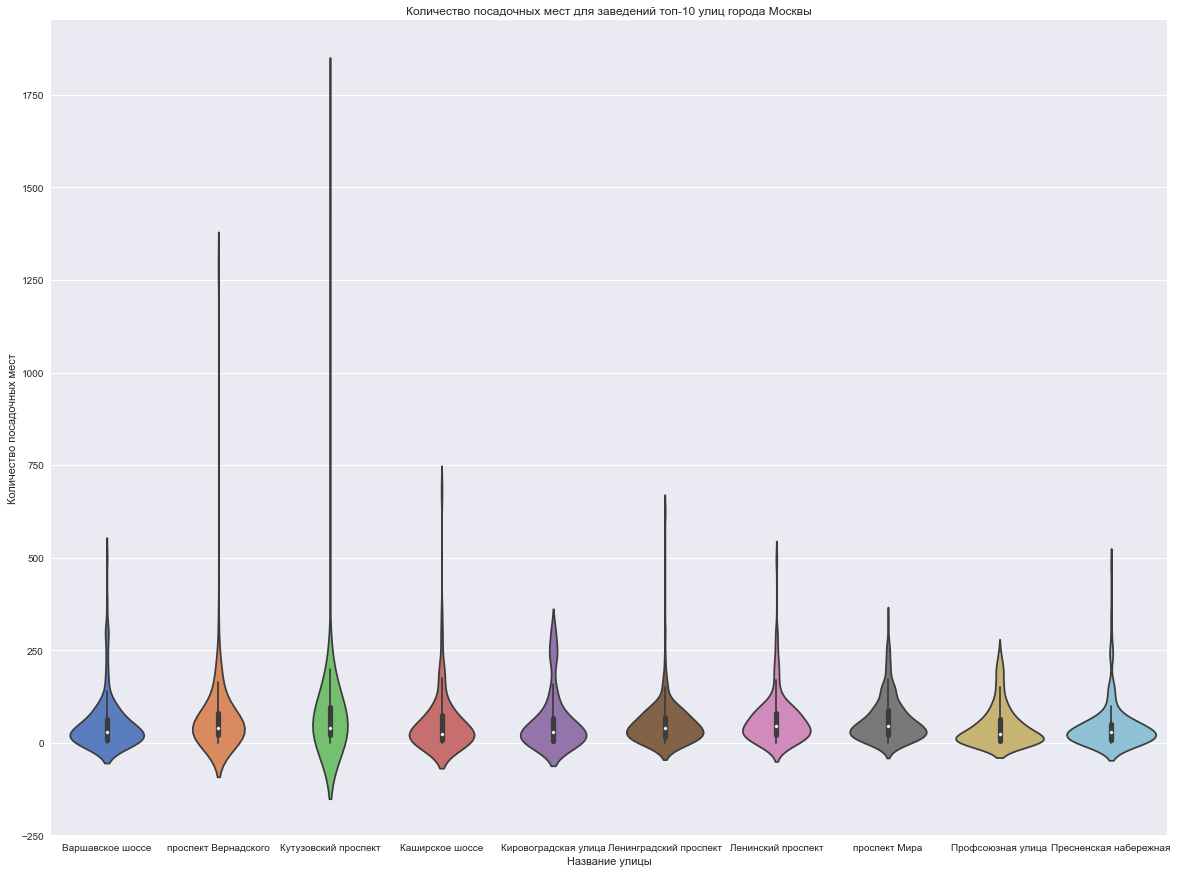

In [70]:
plt.figure(figsize = (20,15))
sns.violinplot(x = 'street', y = 'number', data = street_top, split=True)
plt.title('Количество посадочных мест для заведений топ-10 улиц города Москвы')
plt.xlabel('Название улицы')
plt.ylabel('Количество посадочных мест')
plt.show()

### *Вывод:*

*В 50% заведений на всех топ-10 улицах количество посадочных мест не больше ~ 40-50.*

*Не более чем в 10% заведений количество  посадочных мест больше 140.*

*Не более чем в 5% заведений количество посадочных мест больше 200.*

*И не более чем в 1% заведений превышает 300.*

# Вывод:

В ходе исследования были получены следующие результаты:

1.

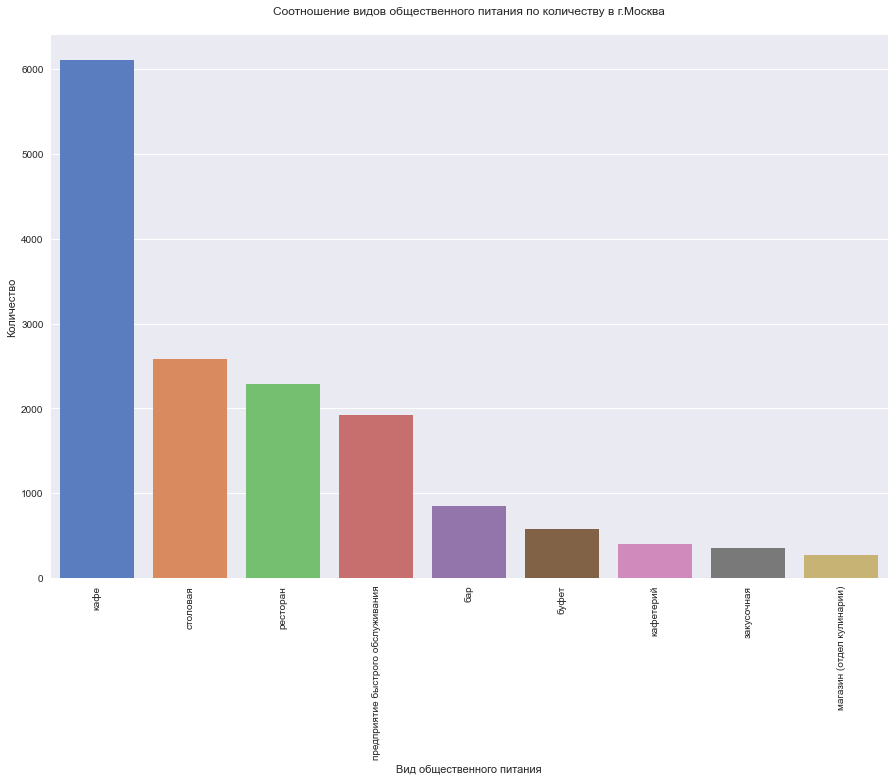

In [71]:
# Построим sns.countplot() из библиотеки seaborn:
plt.figure(figsize = (15,10))
sns.countplot(x = 'object_type', data = df, order = type_count['index'])
plt.title('Соотношение видов общественного питания по количеству в г.Москва', pad = 20)
plt.xlabel('Вид общественного питания')
plt.ylabel('Количество')
plt.xticks(rotation='90')
plt.show()

В г.Москва больше всех заведений общественного питания с типом 'Кафе': ~6000.

С типом: 'Столовая': ~2500, 'Ресторан': ~2200, 'Предприятие быстрого обслуживания': ~1900.

С типом: 'Бар': ~850, 'Буфет': ~600, 'Кафетерий' и 'Закусочная': ~400

Меньше всех заведений общественного питания с типом 'Отдел кулинарии'(в магазинах): ~300.

2. В г.Москва, в основном, заведения общественного питания не являются сетевыми: ~ 80,7%. И только ~ 19,3% - являются сетевыми.

3. Сетевое распространение характерно для всех типов заведений общественного питания. Но, в основном, для заведений типа: кафе, предприятие быстрого обслуживания, ресторан.

4. Для сетевых заведений характерно: много заведений с относительно небольшим числом посадочных мест в каждом.

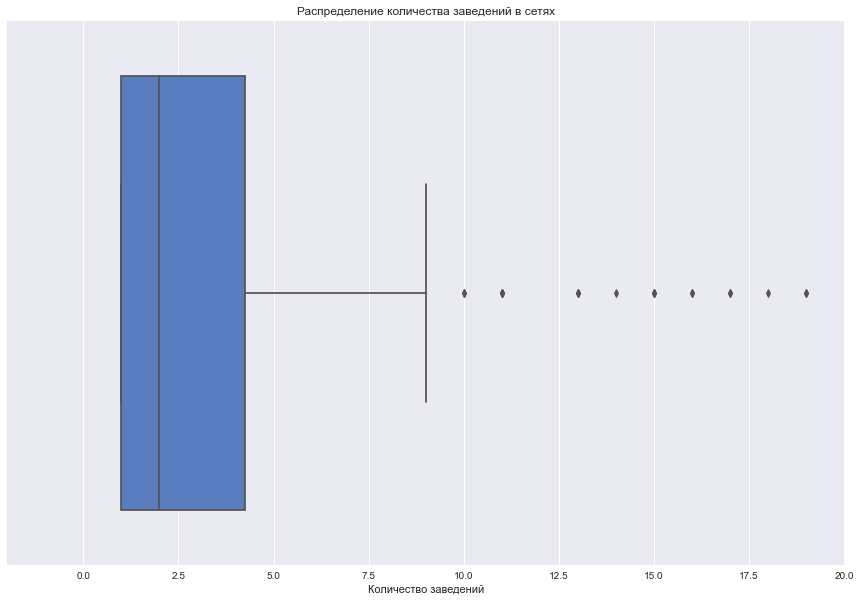

In [72]:
# Построим "ящик с усами"
plt.figure(figsize = (15,10))
sns.boxplot(x = 'chain', data = col)
plt.xlim(-2, 20)
plt.title("Распределение количества заведений в сетях")
plt.xlabel('Количество заведений')
plt.show()

Для сетей общественного питания характерно наличие нескольких заведений в конкретном городе, стране, мире. Например, "Бургер Кинг", "Макдоналдс", "KFC" - крупные сети. Их бренд знают во всем мире.

Разделим сети Москвы на две группы: 

•	крупные с раскрученным брендом;

•	мелкие, развивающиеся сети.

Количество заведений в мелких развивающихся сетях в Москве: от 2 до 13. 
Количество заведений в крупных сетях с раскрученным брендом составляет от 13 и выше. 








5. Количество посадочных мест в сетевых заведениях:

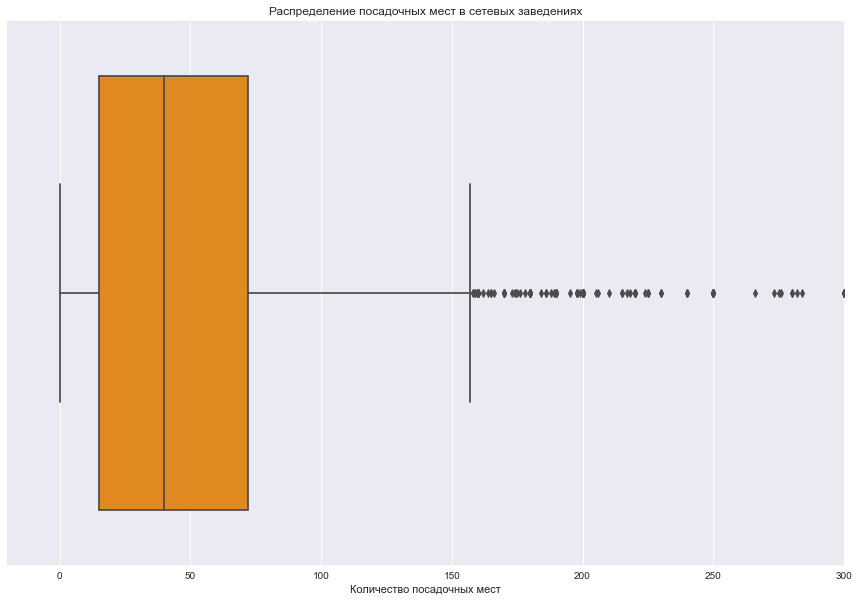

In [73]:
# Построим "ящик с усами"
plt.figure(figsize = (15,10))
sns.boxplot(x = 'number', data = df_chain_yes, color = 'darkorange')
plt.xlim(-20, 300)
plt.title("Распределение посадочных мест в сетевых заведениях")
plt.xlabel('Количество посадочных мест')
plt.show()

Медианное количество посадочных мест в сетевых заведениях: ~40. То есть:

В 50% всех заведений количество посадочных мест лежит в диапазоне от 0 до 40.

В остальных 50% заведениях: количество посадочных мест составляет: 40 - 300.


6. Результаты исследования посадочных мест по типу заведения следующие:

*КАФЕ: среднее количество посадочных мест ~30. Для 95% заведений число не превышает 100. И лишь для 1% число мест превышает 190.*

*СТОЛОВАЯ: среднее количество посадочных мест ~103. Для 95% заведений число не превышает 300. И лишь для 1% число мест превышает 330.*

*ЗАКУСОЧНАЯ: 50% заведений не имеют посадочных мест. Остальные 50% имеют  небольшое количество. Не более в 10% число мест превышает 22. Не более в 5% - превышает 35.И лишь для 1% число мест превышает 60.*

*ПРЕДПРИЯТИЕ БЫСТРОГО ОБСЛУЖИВАНИЯ: среднее количество посадочных мест ~5.  Не более в 10% число мест превышает 60. Не более в 5% - превышает 92.И лишь для 1% число мест превышает 170.*

*РЕСТОРАН: среднее количество посадочных мест ~80.  Не более в 10% число мест превышает 180. Не более в 5% - превышает 250.И лишь для 1% число мест превышает 500.*

*КАФЕТЕРИЙ: среднее количество посадочных мест ~6.  Не более в 10% число мест превышает 21. Не более в 5% - превышает 30.И лишь для 1% число мест превышает 50.*

*БУФЕТ: среднее количество посадочных мест ~32.  Не более в 10% число мест превышает 120. Не более в 5% - превышает 170. И лишь для 1% число мест превышает 250.*

*БАР: среднее количество посадочных мест ~35.  Не более в 10% число мест превышает 85. Не более в 5% - превышает 100. И лишь для 1% число мест превышает 180.*

*МАГАЗИН(ОТДЕЛ КУЛИНАРИИ): 50% заведений не имеют посадочных мест. Остальные 50% имеют  небольшое количество.  Не более в 10% число мест превышает 15. Не более в 5% - превышает 30. И лишь для 1% число мест превышает 40.*

*Итак, самое большое число посадочных мест предоставляет заведение общественного питания с типом: столовая.*

7. Топ-10 улиц г. Москва где сосредоточено больше всех заведений:

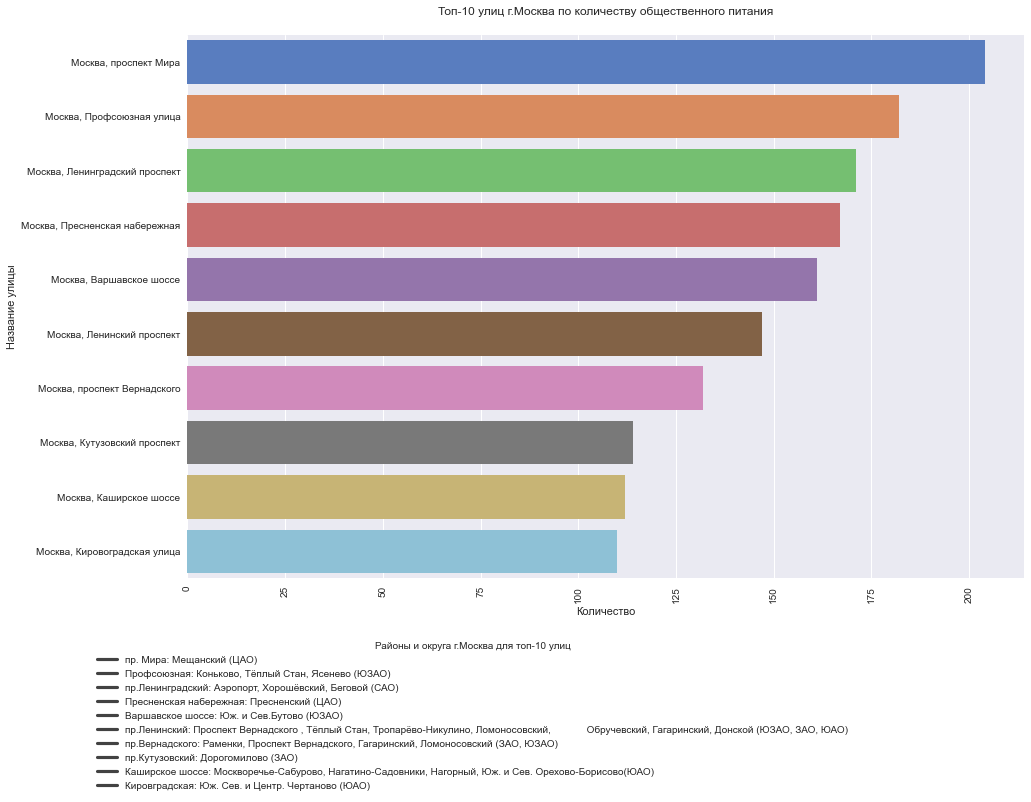

In [74]:
# Построим sns.barplot() из библиотеки seaborn:
plt.figure(figsize = (15,10))
sns.barplot(y = 'street', x = 'object_name', data = street_table_result)
plt.title('Топ-10 улиц г.Москва по количеству общественного питания', pad = 20)
plt.ylabel('Название улицы')

plt.legend((['пр. Мира: Мещанский (ЦАО)', 'Профсоюзная: Коньково, Тёплый Стан, Ясенево (ЮЗАО)',\
            'пр.Ленинградский: Аэропорт, Xорошёвский, Беговой (САО)','Пресненская набережная: Пресненский (ЦАО)',\
            'Варшавское шоссе: Юж. и Сев.Бутово (ЮЗАО)',\
            'пр.Ленинский: Проспект Вернадского , Тёплый Стан, Тропарёво-Никулино, Ломоносовский, \
            Обручевский, Гагаринский, Донской (ЮЗАО, ЗАО, ЮАО)',\
            'пр.Вернадского: Раменки, Проспект Вернадского, Гагаринский, Ломоносовский (ЗАО, ЮЗАО)', \
            'пр.Кутузовский: Дорогомилово (ЗАО)',\
            'Каширское шоссе: Mоскворечье-Cабурово, Нагатино-Садовники, Нагорный, Юж. и Сев. Орехово-Борисово(ЮАО)',\
           'Кировградская: Юж. Сев. и Центр. Чертаново (ЮАО)']),
     title = 'Районы и округа г.Москва для топ-10 улиц',
          bbox_to_anchor = (0.8, -0.1))
plt.xlabel('Количество')
plt.xticks(rotation='90')
plt.show()

Улицы имеют большую протяженность и охватывают несколько районов.

Данные улицы расположены в округах: центральный, западный, юго-западный, южный, северный.

Больше всех заведений общественного питания расположено на пр.Мира в Центральном административном округе: ~200.

8.

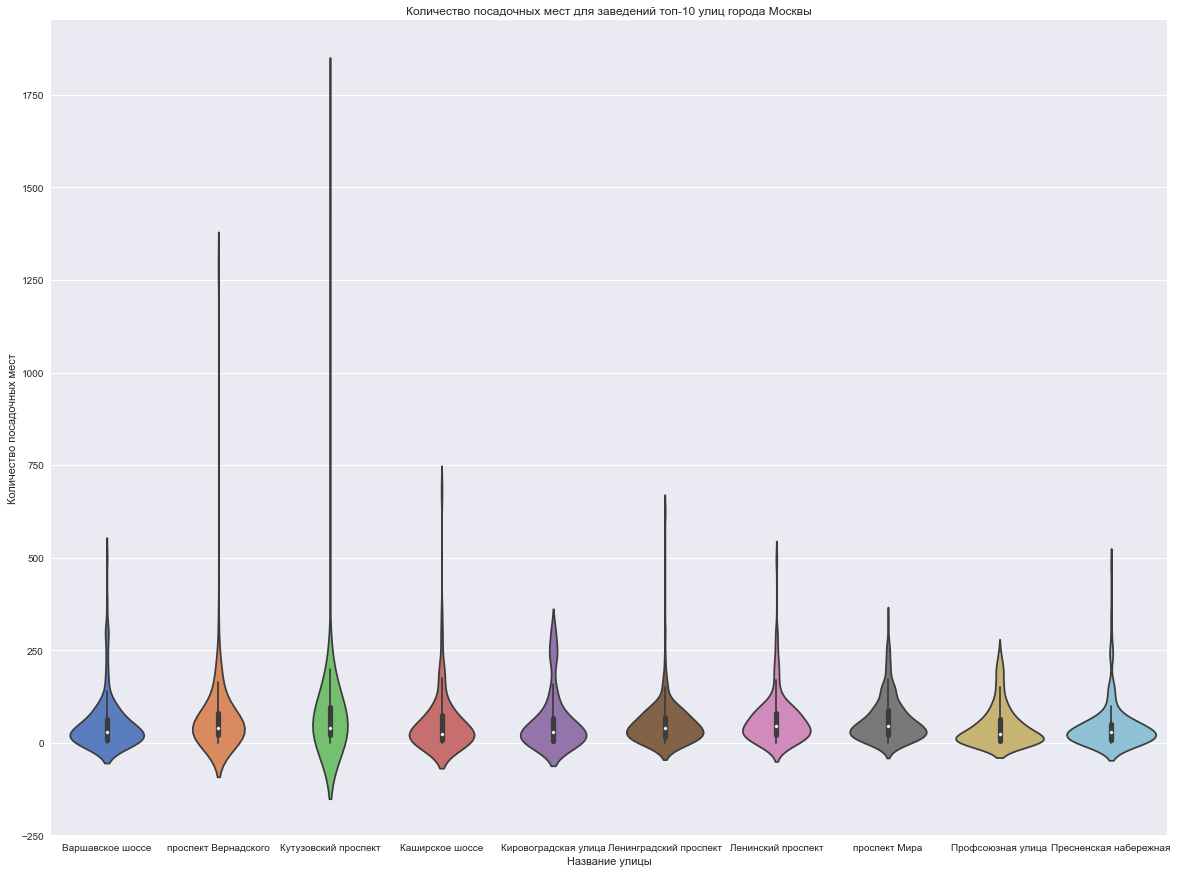

In [75]:
plt.figure(figsize = (20,15))
sns.violinplot(x = 'street', y = 'number', data = street_top, split=True)
plt.title('Количество посадочных мест для заведений топ-10 улиц города Москвы')
plt.xlabel('Название улицы')
plt.ylabel('Количество посадочных мест')
plt.show()

В 50% заведений на всех топ-10 улицах количество посадочных мест не больше ~ 40-50.

Не более чем в 10% заведений количество посадочных мест больше 140.

Не более чем в 5% заведений количество посадочных мест больше 200.

И не более чем в 1% заведений превышает 300.

9. Были выявлены улицы, на которых расположен один объект общественного питания:

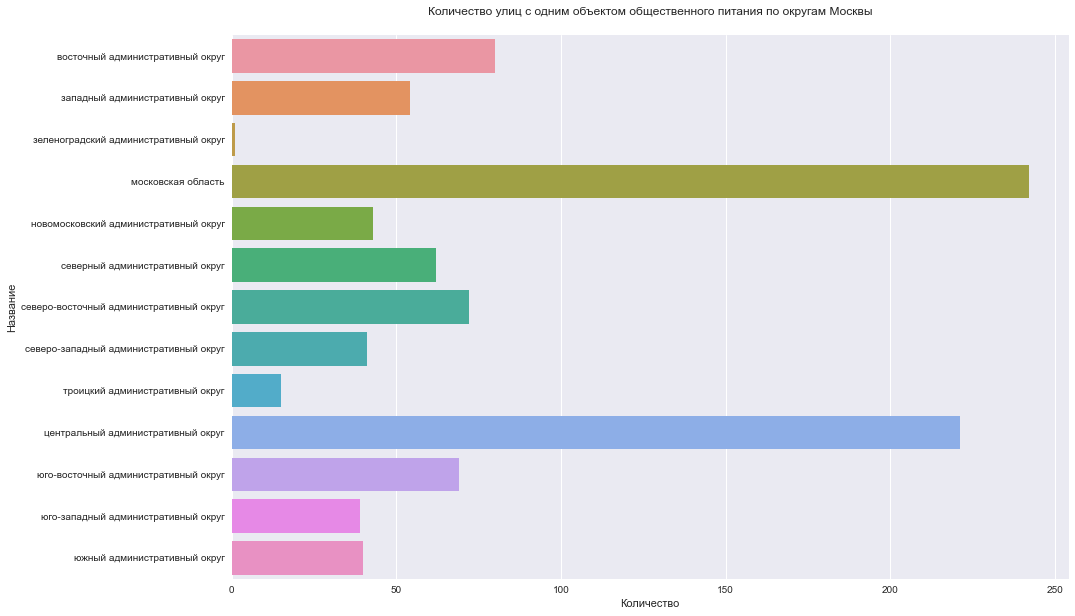

In [76]:
plt.figure(figsize = (15,10))
sns.barplot(y = 'okrug', x = 'street_count', data = okrug_one)
plt.title('Количество улиц с одним объектом общественного питания по округам Москвы', pad = 20)
plt.ylabel('Название')
plt.xlabel('Количество')
plt.show()

На 628 улицах г.Москвы расположено одно заведение общественного питания.

Больше всего улиц с одним объектом общественного питания находится  в центральном административном округе: ~200 и Московской области: ~250.

# Рекомендации:

1. Тип открывающегося объекта общественного питания: "кафе";

2. Число посадочных мест: ~ от 50 до 100;

3. Место расположения: Центральный административный округ г.Москвы.

# Приложения: 

[Презентация](https://yadi.sk/i/y-2mJrN9MFGULQ)

Таблица, содержащая улицы с одним объектом общественного питания в ЦАО Москвы:

In [77]:
result_total = new_one[new_one['okrug'] == 'центральный административный округ']